# Laboratorio 2022-2023

##  Sesión 14: Experimentos aleatorios

La teoría de la probabilidad se encarga de estudiar *experimentos aleatorios*, es decir, experimentos cuyo resultado no consideramos predecible con certeza. Por ejemplo, cuando lanzamos una moneda al aire es imposible predecir si el resultado va a ser *cara* o *cruz*. Es cierto que, en principio, podríamos argumentar que las leyes de la mecánica deben permitir calcular de manera exacta la trayectoria de la moneda una vez se sabe cómo ha sido lanzada, de forma que sería posible predecir de antemano el resultado. Sin embargo, en la práctica tal cálculo es imposible, ya que pequeñísimas variaciones en las condiciones del lanzamiento afectan drásticamente al resultado. 

En el caso de una moneda *normal*, es de suponer que los dos posibles resultados pueden ocurrir con la misma probabilidad (hablamos de una moneda *equilibrada*, y en caso contrario decimos que la moneda está *trucada* o *cargada*).

Si se tiran tres monedas, pueden darse ocho resultados: CCC, CCX, CXC, XCC, CXX, XCX, XXC, XXX. Si las monedas están equilibradas, cada uno de esos resultados se dará, en promedio, una de cada 8 veces que tiremos las monedas. Por tanto, la probabilidad de sacar exactamente dos caras al tirar las tres monedas es 3/8. Esto es un ejemplo de la famosa regla de Laplace: la probabilidad de que se dé un cierto suceso $A$ es  $$p(A)=\frac{\text{casos favorables a }A}{\text{casos totales}},$$ fórmula que es de aplicación siempre
que todos los resultados del experimento realizado pueden darse con la misma probabilidad.

## Frecuencia y probabilidad. ##

Si realizamos el experimento aleatorio un número grande de veces, $M$, y denotamos por $M_A$ al número de   ocasiones en que se ha producido un cierto suceso $A$, la *frecuencia relativa*
$$
f(A)=\frac{M_A}{M}
$$
dará un valor, lógicamente, cercano a la probabilidad teórica $p(A)$: es de esperar que si $M$ es pequeño haya dado la casualidad de que se hayan dado resultados poco probables, pero para $M$ grande este efecto se verá mitigado. De hecho, el límite de la frecuencia relativa $f(A)$ debe tender a $p(A)$ cuando el número de repeticiones $M$ del experimento  tiende a infinito.

En esta sesión calcularemos probabilidades teóricas de sucesos sencillos contando casos favorables y casos posibles, y también *simularemos experimentos aleatorios* a partir de los generadores de *números aleatorios* (todos los posibles resultados son igualmente probables):

- ${\tt randint}({\tt a,b})$, que produce un **entero** en el intervalo cerrado $[a, b]$ (es decir, los extremos están incluidos); 

- ${\tt random}()$, que produce un **decimal** perteneciente al intervalo $[0, 1)$ (incluye el $0$, pero no el $1$). Por supuesto, el resultado es siempre un número racional: los reales no racionales no existen para la máquina.

Estas simulaciones nos permitirán dar aproximaciones experimentales de probabilidades (simularemos con SAGE que hemos repetido un número grande de veces el experimento). Ser capaces de hacer esta simulación es especialmente útil cuando el cálculo teórico de $p(A)$ es difícil, o incluso imposible. Empezaremos por dar algunas herramientas útiles para estos cálculos.

### Generadores
#### Combinaciones

Dado un conjunto de tamaño $m$, las combinaciones de $j$ elementos del conjunto son todos los posibles subconjuntos con $j$ elementos extraídos del conjunto (para $j=0$ se tiene un único subconjunto de tamaño $0$, el vacío).

En SAGE, podemos recorrer las combinaciones con el generador ${\tt Combinations}()$ aplicado a un contenedor (lista, tupla, cadena, conjunto, ...) con todos los elementos disponibles para escoger. Si se indica un segundo argumento, $j$, (un entero no negativo), genera las combinaciones de $j$ elementos.

In [3]:
# Ejecuta y analiza
T='123'
print(Combinations(T))
print([combi for combi in Combinations(T)])
print([combi2 for combi2 in Combinations(T,2)]) # Combinaciones de longitud 2

Combinations of ['1', '2', '3']
[[], ['1'], ['2'], ['3'], ['1', '2'], ['1', '3'], ['2', '3'], ['1', '2', '3']]
[['1', '2'], ['1', '3'], ['2', '3']]


In [4]:
#Observa que los elementos que genera Combinations() son subconjuntos, no listas ordenadas 
#(en el ejemplo anterior una combinación es ['1','2'], y no hay que contar ['2', '1'] como diferente).
# Ejecuta y analiza
T='1231'
print(Combinations(T))
print([combi for combi in Combinations(T)])
print([combi2 for combi2 in Combinations(T,2)])

Combinations of ['1', '2', '3', '1']
[[], ['1'], ['2'], ['3'], ['1', '1'], ['1', '2'], ['1', '3'], ['2', '3'], ['1', '1', '2'], ['1', '1', '3'], ['1', '2', '3'], ['1', '1', '2', '3']]
[['1', '1'], ['1', '2'], ['1', '3'], ['2', '3']]


En Matemáticas el número combinatorio $\binom mj$ es la cantidad de combinaciones de $j$ elementos de un conjunto de tamaño $m$: en SAGE se calcula este número combinatorio como ${ \tt binomial(m,j)}$. Como generador, ${\tt Combinations}()$ no se puede medir con ${\tt len}()$, pero sí con el método ${\tt .cardinality}()$, o construyendo una lista con todas las combinaciones y utilizando ${\tt len}()$.

In [8]:
# Ejecuta y analiza
m, j=6,2
LL=[1..m]
Combinaciones=[comb for comb in Combinations(LL)]
print(f"Combinaciones: {Combinaciones}")
print()
t=sum([len(comb)==j for comb in Combinaciones]) # Número de subconjuntos con 2 elementos.
print(t, binomial(m,j)) # Binomial es el número combinatorio entre m y j

Combinaciones: [[], [1], [2], [3], [4], [5], [6], [1, 2], [1, 3], [1, 4], [1, 5], [1, 6], [2, 3], [2, 4], [2, 5], [2, 6], [3, 4], [3, 5], [3, 6], [4, 5], [4, 6], [5, 6], [1, 2, 3], [1, 2, 4], [1, 2, 5], [1, 2, 6], [1, 3, 4], [1, 3, 5], [1, 3, 6], [1, 4, 5], [1, 4, 6], [1, 5, 6], [2, 3, 4], [2, 3, 5], [2, 3, 6], [2, 4, 5], [2, 4, 6], [2, 5, 6], [3, 4, 5], [3, 4, 6], [3, 5, 6], [4, 5, 6], [1, 2, 3, 4], [1, 2, 3, 5], [1, 2, 3, 6], [1, 2, 4, 5], [1, 2, 4, 6], [1, 2, 5, 6], [1, 3, 4, 5], [1, 3, 4, 6], [1, 3, 5, 6], [1, 4, 5, 6], [2, 3, 4, 5], [2, 3, 4, 6], [2, 3, 5, 6], [2, 4, 5, 6], [3, 4, 5, 6], [1, 2, 3, 4, 5], [1, 2, 3, 4, 6], [1, 2, 3, 5, 6], [1, 2, 4, 5, 6], [1, 3, 4, 5, 6], [2, 3, 4, 5, 6], [1, 2, 3, 4, 5, 6]]

15 15


### Permutaciones
En el caso anterior (combinaciones) agrupaciones con los mismos elementos pero en distinto orden no se consideran como distintas. Las variaciones sí se distinguen por el orden. El generador de Sage para este caso es ${\tt Permutations}()$. Como con el generador anterior, si se indica como segundo parámetro un entero no negativo $j$, nos restringimos a las variaciones con $j$ elementos.
En matemáticas, el cardinal de las permutaciones se calcula con el factorial.

In [5]:
# Ejecuta y analiza
m=3
LL=[1..m]
t=0
for pp in Permutations(LL):
    t+=1
    print(pp)
t, factorial(3)

[1, 2, 3]
[1, 3, 2]
[2, 1, 3]
[2, 3, 1]
[3, 1, 2]
[3, 2, 1]


(6, 6)

In [6]:
# Ejecuta y analiza
m,j=4,2
LL=[1..m]
t=0
for pp in Permutations(LL, j):
    t+=1
    print(pp)
t, factorial(m)/factorial(m-j)

[1, 2]
[1, 3]
[1, 4]
[2, 1]
[2, 3]
[2, 4]
[3, 1]
[3, 2]
[3, 4]
[4, 1]
[4, 2]
[4, 3]


(12, 12)

#### Repeticiones
Podemos investigar qu&eacute; ocurre al aplicar estos generadores a contenedores (pueden ser listas, como antes, cadenas de caracteres, conjuntos,..) con elementos repetidos.

In [9]:
# Ejecuta y analiza
LL='abcaab'
print(LL)
m,j,t=len(LL),4,0
for comb in Combinations(LL,j):
    t+=1
    print(comb,''.join(comb))
t

abcaab
['a', 'a', 'a', 'b'] aaab
['a', 'a', 'a', 'c'] aaac
['a', 'a', 'b', 'b'] aabb
['a', 'a', 'b', 'c'] aabc
['a', 'b', 'b', 'c'] abbc


5

**Ejercicio 1.-** **a)** Calcula mediante la regla de Laplace la probabilidad de que al tirar $10$ veces una moneda equilibrada se obtengan $8$ caras.
*Observación:* Si ${\tt ntiradas}$ es el número de tiradas, ¿qué se genera con ${\tt Permutations}({\tt'CX'*ntiradas, ntiradas})$?

In [18]:
ntiradas = 10
# permutaciones = [perm for perm in Permutations('CX'*ntiradas,ntiradas)]
# print(permutaciones)
fav = 0
tot = 0
for perm in Permutations('CX'*ntiradas,ntiradas):
    tot += 1
    if perm.count('C') == 8:
        fav+=1

print(f"La probabilidad es {fav/tot}, {(fav/tot).n()}")

670442572800
La probabilidad es 45/1024, 0.0439453125000000


**b)** Se puede simular el experimento aleatorio de tirar una moneda con ayuda de ${\tt randint}({\tt a,b})$, que genera un entero en el intervalo cerrado $[a,b]$. Puedes hacer que cada resultado de ejecutar ${\tt randint}({\tt 0,1})$ corresponda a una tirada de moneda (y que 0 signifique cruz y 1 cara, por ejemplo).

Simula 10000 veces el experimento de tirar 10 veces la moneda y apuntar el número de caras, y calcula la frecuencia con la que se han obtenido exactamente 8 caras.

In [19]:
# Esto es montecarlo.
ntiradas = 10
M = 10000
exito = 8
exitos = 0
for _ in xsrange(M):
    resultado = sum([randint(0,1) for _ in [1..ntiradas]]) # Lo mismo a for _ in xsrange(ntiradas) xsrange más eficiente pk es generador.
    if resultado == exito:
        exitos += 1

print(exitos/M, (exitos/M).n())

223/5000 0.0446000000000000


**Ejercicio 2.-** **a)** Una bolsa contiene 999 bolas numeradas del 2 al 1000. Se elige al azar una de ellas. Tras devolverla a la bolsa, se hace una segunda extracción. ¿Cuál es la probabilidad (obtenida por la regla de Laplace) de que los números de las dos extracciones sean primos entre sí?

In [43]:
Bolas = [2..1000]
fav, tot = 0, 0
for j in Bolas:
    for k in Bolas: # Se reemplaza la bola
        tot += 1
        if gcd(j,k) == 1: # Condición de éxito
            fav += 1 # Contabilizamos los favorables

print(fav/tot, (fav/tot).n())


67376/110889 0.607598589580572


**b)** Simula la realización de 10000 repeticiones del experimento descrito en el apartado anterior y calcula con qué frecuencia los números de las dos extracciones han sido primos entre sí en la simulación.

In [50]:
M = 10^5
exitos = 0
for _ in xsrange(M):
    a, b = randint(2,1000), randint(2,1000)
    if gcd(a,b) == 1:
        exitos += 1 

print(exitos/M, (exitos/M).n())

60669/100000 0.606690000000000


In [52]:
# de otra forma
M = 10^5
exitos = 0
for _ in xsrange(M):
    a, b = randint(2,1000), randint(2,1000)
    if gcd(a,b) == 1:
        exitos += 1./M

print(exitos, exitos.n()) # Ahora exitos = exitos.n()

0.605989999999877 0.605989999999877


**Ejercicio 3.-** Repite el ejercicio anterior (ambos apartados) pero suponiendo que la bola extraída en primer lugar no se devuelve a la bolsa antes de la segunda extracción.

In [54]:
a, b = 2, 1000
fav, tot = 0, 0
for j in [a..b-1]:
    for k in [j+1..b]: # Se reemplaza la bola
        tot += 1
        if gcd(j,k) == 1: # Condición de éxito
            fav += 1 # Contabilizamos los favorables

print(fav/tot, (fav/tot).n())

33688/55389 0.608207405802596


In [61]:
# Segundo apartado
M = 10^5
exitos = 0
for _ in xsrange(M):
    a, b = randint(2,1000), randint(2,1000)
    while b == a:
        b = randint(2,1000)
    if gcd(a,b) == 1:
        exitos += 1./M

print(exitos, exitos.n()) # Ahora exitos = exitos.n()

0.608499999999865 0.608499999999865


____________

En el segundo apartado de cada ejercicio hemos ilustrado cómo en lugar de calcular "todos los casos favorables/todos los casos posibles", podemos hacer un *muestreo aleatorio* y calcular la frecuencia relativa (esto se llama **método de Montecarlo**).

Como dijimos arriba podemos simular el lanzamiento de una moneda equilibrada ejecutando ${\tt randint}(0,1)$ y decidiendo que $1$ significa 'cara' (con lo que $0$ será 'cruz'). Alternativamente, podemos sortear con ${\tt random}()$ y decidir que ha salido 'cara' si ${\tt random}()<0.5$ (y 'cruz' en caso contrario). Una tercera opción es usar la función $\texttt{choice()}$ que aplicada a una lista, una tupla o una cadena de caracteres, escoge aleatoriamente uno de sus elementos. Así, $\texttt{choice('CX')}$ devuelve $\texttt{'C'}$=cara o $\texttt{'X'}$=cruz con igual probabilidad.

In [21]:
# Ejecuta y analiza
[choice('CX') for _ in xsrange(1000)].count('X')

514

Veamos ahora cómo simular una moneda trucada.  Si $p$ es la probabilidad de sacar 'cara' al tirar una moneda, el test '${\tt random}()<p$' devolverá 'True' con una probabilidad $p$.

**Ejercicio 4.-** a) Simula el siguiente experimento: lanza monedas cargadas, que dan cara con probabilidad $p$, hasta obtener la primera cara, y anota el número de cruces que has obtenido.

*Sugerencia:* Codifica una función que simule lanzamientos de una moneda que da cara con probabilidad $p$ hasta la obtención de la primera cara y que devuelva el número de cruces obtenidas antes de que eso suceda.

In [23]:
def Cara(p):
    return random()<p

In [25]:
p=1/3
[Cara(p) for _ in xsrange(10)]
sum([Cara(p) for _ in xsrange(10)])

4

In [27]:
# Ejercicio
M = 10^4
p = 1/3
Resultados = []
for _ in xsrange(M):
    cruces = 0
    while not Cara(p):
        cruces += 1
    Resultados.append(cruces)

Resultados[-3:]

[3, 1, 1]

In [3]:
# Modo diccionario
p = 1/5
M = 10^4
Resultados = []
for _ in xsrange(M):
    cruces = 0
    tirada = (random()<p)
    while not tirada:
        cruces += 1
        tirada = (random()<p)
    Resultados.append(cruces)

In [28]:
def Geometrica(p):
    # La función espera la probabilidad de cara y devuelve el número de cruces que salieron antes de la primera cara
    cruces = 0
    while random()>p:
        cruces += 1
    return cruces


In [30]:
p=1/5#Un ejemplo de 10 usos con una moneda con probabilidad 1/5 de cara
DiezResultados=[Geometrica(p) for _ in xsrange(10)]
print(DiezResultados)

[1, 1, 16, 6, 2, 3, 0, 6, 0, 15]


En el siguiente apartado usaremos una estructura de datos de Sagemath que no hemos manejado hasta ahora: el _diccionario_.

Un diccionario es una colección de pares clave-valor. Si una lista es una colección de objetos indexada por números enteros consecutivos, un diccionario permite como clave cualquier tipo de datos (que no se puedan modificar), y los valores pueden ser totalmente arbitrarios.

Ejecutando y analizando la celda siguiente podrás tener una primera idea de cómo crear y usar un diccionario. En próximas sesiones iremos viendo otras posibilidades relacionadas con esta estructura.

In [31]:
# Simulamos la elección al azar de letras de un alfabeto un número grande de veces. Vamos a hacer un diccionario
# con las frecuencias de aparición de cada letra. Las claves del diccionario serán las letras del alfabeto que salgan alguna
# vez y los valores el número de apariciones.

Frec=dict()                # Esta instrucción crea un diccionario vacío
alfabeto='abcdefghijklmnopqrstuvwxyz' # Vamos a simular la elección al azar de una letra de un alfabeto con 26 letras
for _ in xsrange(50):      # Hacemos 50 elecciones
    letra=choice(alfabeto) # Elegimos al azar una letra del alfabeto
    if letra in Frec:      # Se comprueba si la letra extraída al azar está entre las claves del diccionario
        Frec[letra]+=1     # Aumentamos en una unidad el número de apariciones (sumamos uno al valor previo)
    else:                  # La letra extraída no estaba todavía entres las claves del diccionario
        Frec[letra]=1      # Esta es una forma de crear una nueva entrada en un diccionario, asignar un valor a una clave
show(Frec)                 # Mostramos el contenido del diccionario
print(Frec['a'])           # Mostramos cuántas veces ha salido la 'a' (el valor correspondiente a la clave 'a')
show(Frec.keys())          # Veamos las letras que han aparecido (las claves del diccionario). El método .values() daría 
                           # los valores, y el método .items() una lista de pares (clave,valor)
print(len(Frec.keys()))    # Veamos si han salido las 26
show(Frec.values()) 
show(Frec.items()) 

{'e': 3,
 'p': 3,
 'k': 4,
 'j': 2,
 'i': 2,
 'b': 1,
 'w': 4,
 'l': 2,
 'h': 2,
 'g': 2,
 'q': 2,
 'x': 1,
 'm': 1,
 'a': 2,
 'f': 6,
 's': 2,
 'u': 2,
 'v': 1,
 'c': 3,
 'd': 2,
 'y': 2,
 'o': 1}

2


dict_keys(['e', 'p', 'k', 'j', 'i', 'b', 'w', 'l', 'h', 'g', 'q', 'x', 'm', 'a', 'f', 's', 'u', 'v', 'c', 'd', 'y', 'o'])

22


dict_values([3, 3, 4, 2, 2, 1, 4, 2, 2, 2, 2, 1, 1, 2, 6, 2, 2, 1, 3, 2, 2, 1])

dict_items([('e', 3), ('p', 3), ('k', 4), ('j', 2), ('i', 2), ('b', 1), ('w', 4), ('l', 2), ('h', 2), ('g', 2), ('q', 2), ('x', 1), ('m', 1), ('a', 2), ('f', 6), ('s', 2), ('u', 2), ('v', 1), ('c', 3), ('d', 2), ('y', 2), ('o', 1)])

b) Repite $M=10000$ veces el experimento del apartado anterior con una moneda con probabilidad $p=0.3$ de obtener cara. Construye un diccionario $F$ (de frecuencias) que anote los números de cruces hasta la primera cara de cada experimento (como claves del diccionario) y el total de ocasiones en que se dieron ese número de cruces en el total de repeticiones del experimento (como valores de cada clave).

Muestra un gráfico que ilustre el resultado del experimento, representando los pares (resultado,frecuencia con que se da). 

_Sugerencia:_ Puede resultar útil el método .items().

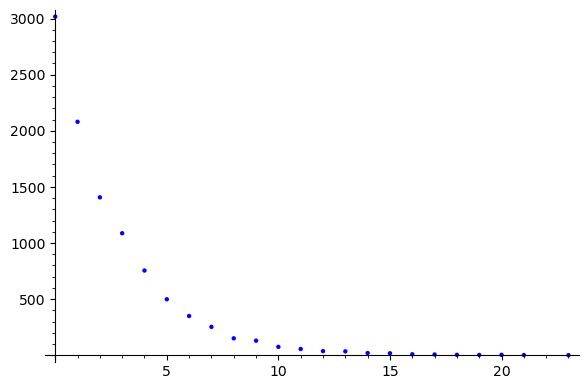

In [34]:
M = 10^4
p = 0.3
F = {}
for _ in xsrange(M):
    cruces = Geometrica(p)
    if cruces in F:
        F[cruces] += 1
    else:
        F[cruces] = 1

#lista_F = list(F.items())
#lista_F.sort()
#show(lista_F)
show(points(F.items()))

c) A la vista del experimento anterior, ¿cuál parece la probabilidad de que haya que tirar **exactamente** $6$ veces esa moneda para obtener la primera cara. Compárala con la probabilidad teórica que es $p\cdot(1-p)^5$ para $p=0.3$ (¿por qué?).

In [35]:
N(F[5]/M),p*(1-p)^5

(0.0499000000000000, 0.0504210000000000)

d) ¿Cuál es el número medio de cruces observadas en las $M=10000$ repeticiones del experimento? Compáralo con el valor teórico, que es $\frac{1-p}p$ para $p=0.3$.

In [16]:
media = sum([j*F[j] for j in F])/M
print(media, media.n())

media_teorica = (1-p)/p
print(media_teorica)

23323/10000 2.33230000000000
2.33333333333333


**Ejercicio 5.-** En cada apartado, escribe una función para simular un lanzamiento del tipo de dado descrito. Simula experimentos aleatorios adecuados para aproximar las probabilidades pedidas.

**a)** Se tira un dado perfecto. ¿Cuál será la probabilidad de conseguir salir antes del cuarto turno en una partida de parchís? Recuerda que en el parchís  se sale cuando el dado marca un 5.

_Observación:_ Podemos simular un lanzamiento de un dado (con seis caras) equilibrado por medio de la instrucción $\texttt{randint(1,6)}$. 

In [37]:
# a)
# Definimos el experimento "tirar el dado (hasta) 3 veces y ver 
# si sale un 5". Al utilizarla con SalirParchis() toma el tope
# con valor 3 (valor por defecto); se puede cambiar, en el uso,
# este valor: SalirParchis(4) tomaría "tope" con valor 4.

def SalirParchis(tope=3):
    for _ in xsrange(tope):
        if randint(1,6)==5: return True
    return False

In [38]:
# Simulamos para obtener un valor aproximado de la probabilidad 
# pedida

M=10^5
exitos=0
for _ in xsrange(M):
    exitos+=SalirParchis()
(exitos/M).n()

0.423590000000000

In [39]:
# La probabilidad exacta es esta (¿sabes por qué?)
(1-(5/6)**3).n()

0.421296296296296

**b)** Se juega al parchís con un dado trucado en el $6$: este sale el doble de veces que los demás. Si se saca $6$ en un turno, el jugador repite turno; pero si saca tres seises seguidos, la ficha vuelve a la casilla de inicio. Sin tener en cuenta otras reglas que permitan volver a tirar, aproxima la probabilidad de regresar al inicio en un turno del parchís si se juega con este dado trucado.

_Observación:_ La función $\texttt{choice()}$ es muy útil para simular dados trucados. Por ejemplo, podemos simular un lanzamiento del dado de este apartado por medio de $\texttt{choice([1..5]+[6]*2)}$.

In [41]:
# b) Definimos el experimento "Tirar el dado y, si sale un 6, 
# repetir, para ver si sucede que salgan tres (el tope por
# defecto) 6's seguidos"

def parchisVolver(tope=3):
    truco=[1..5]+[6]*2 #Aquí creamos (virtualmente) el dado trucado
    for _ in xsrange(tope):
        if choice(truco)!=6: 
            return False
    return True

In [42]:
# Simulamos para calcular aproximadamente la probabilidad pedida

M=10^5
exitos=0
for _ in xsrange(M):
    exitos+=parchisVolver()
(exitos/M).n()

0.0231200000000000

In [43]:
# El valor teórico exacto de esta probabilidad es este (¿sabes 
# por qué?)

(2./7)^3

0.0233236151603499

**c)** Se tiran dos dados perfectos. ¿Cuál es la probabilidad de conseguir al menos un $7$ (como suma de los dos) en tres tiradas consecutivas de estos dos dados?

In [44]:
# c) Definimos el experimento "tirar 3 (valor por defecto de tiradas)
#veces dos dados y ver si al menos una vez suman 7"

def dados7(tiradas=3):
    for _ in xsrange(tiradas):
        dado1,dado2=randint(1,6),randint(1,6)
        if (dado1+dado2)==7: return True
    return False

In [45]:
# Simulamos para aproximar experimentalmente la probabilidad 
# pedida

M=10^5
favorables=0
for _ in xsrange(M):
    favorables+=dados7()
(favorables/M).n()

0.418520000000000

In [58]:
#La probabilidad exacta, calculada teóricamente, es
1.-(5/6)**3

#¿Por qué? Pista: ¿cuántos de los 6^2=36 posibles resultados 
# de lanzar dos dados dan suma 7?

[[1, 2], [1, 3], [1, 4], [1, 5], [1, 6], [2, 3], [2, 4], [2, 5], [2, 6], [3, 4], [3, 5], [3, 6], [4, 5], [4, 6], [5, 6]]


0.421296296296296

**d)** Se tienen dos dados trucados. En el primero, se consigue $6$ el doble de veces que los demás resultados. En el segundo, el $5$ se obtiene la mitad de veces que los demás. Calcula, por fuerza bruta (es decir, recorriendo todas las posibilidades) y también simulando, la probabilidad de conseguir un $11$ al lanzar estos dos dados.

*Observación:*  ¿Cuántas caras tendrá un dado "físico" que se comporte como el segundo? ¿Cuál es el número total de posibles (pares de) resultados al lanzar los dos dados? ¿Cuáles de esos resultados dan suma 11?

In [59]:
# d)
# Por "fuerza bruta" (Laplace)

t0=walltime() # Vamos a registrar el tiempo tardado para 
              # comparar eficiencias
dado1=[1..5]+2*[6]
dado2=2*[1..4]+[5]+2*[6]
total,favorable=0,0
for j in dado1:
    for k in dado2:
        total+=1
        if (j+k)==11: favorable+=1
prob_teorica=favorable/total 
t_cal_teorico=walltime(t0) # Para comparar con la simulación
prob_teorica, prob_teorica.n()

(4/77, 0.0519480519480520)

In [ ]:
# La probabilidad pedida puede calcularse también teóricamente 
# de este modo (¿por qué?):

(2/7)*(1/11)+(1/7)*(2/11)

In [60]:
# d) Función para simular. 
# Dos posibles maneras equivalentes: usar índices o usar choice

#1. Usando índices
def dados_raros1():
    return (dado1[randint(0,6)]+dado2[randint(0,10)])==11 

#2. Usando choice
def dados_raros2():
    return (choice(dado1)+choice(dado2))==11 

In [61]:
#Simulamos con una de ellas

t1=walltime() # Para comparar eficiencias
M=1e5
favorables=0
for _ in xsrange(M):
    favorables+=dados_raros2()
prob_experimental=(favorables/M)
t_cal_experimental=walltime(t1) # Para comparar con el tiempo 
                                # usado para el cálculo teórico                              # teórico
print('probabilidad experimental=',prob_experimental) 
print('probabilidad teórica=',prob_teorica.n())
print('error absoluto=',abs(prob_experimental-prob_teorica))
print('error relativo=', abs((prob_experimental-prob_teorica)/prob_teorica)*100,'%')

probabilidad experimental= 0.0520000000000000
probabilidad teórica= 0.0519480519480520
error absoluto= 0.0000519480519480461
error relativo= 0.0999999999999888 %


In [62]:
# Comparación de tiempos
print('Por fuerza bruta:',t_cal_teorico)
print('Simulando:',t_cal_experimental)

Por fuerza bruta: 0.0005972385406494141
Simulando: 0.23128700256347656


In [63]:
t_cal_experimental/t_cal_teorico

387.2606786427146